In [ ]:
import csv
import os
import time
import numpy as np
import re
import joblib
from string import punctuation
from sklearn.cluster import DBSCAN
import pickle as pk
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
#from Analyse import dbScan, IForest, filter_out, MCD,MCD_filter_out,dbScan1,IForest1,MCD1
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
import warnings

In [ ]:

warnings.filterwarnings('ignore')

add_punc = '!,;:?"\'、，；().’‘“”'
all_punc = punctuation + add_punc

def removePunctuation(text):
    text = re.sub(r'[{}]+'.format(all_punc),' ',text)
    return text.strip().split()


In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
from sklearn.covariance import EllipticEnvelope
from numpy import quantile, where, random

def dbScan(data_x, data_y,name, eps, minpoint, flag=True): # DBSCAN

    plt.clf()
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    db = DBSCAN(eps=eps, min_samples=minpoint).fit(data_y)

    labels = db.labels_
    output = labels

    minn = min(output)
    if minn < 0:
        output = output + -1*minn
    maxn = max(output)

    X, Y = [], []
    for i in range(maxn+1):
        X.append([])
        Y.append([])
    length = len(data_x)
    mpl.rcParams['axes.unicode_minus'] = False  #
    for i in range(length):
        X[output[i]].append(data_x[i])
        Y[output[i]].append(data_y[i])

    if flag == False:
        for i in range(maxn + 1):
            plt.scatter(X[i], Y[i], s=10)

    index = 0
    for i in range(maxn + 1):
        if len(X[index]) <= len(X[i]):
            index = i
    plt.plot(X[index], Y[index])
    plt.xticks(rotation=90)
    plt.title(name+' '+'DBSCAN')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('DBSCAN')
    #print(img_path)
    plt.show()

def MCD(data_x, data_y, name,contamination=0.02, flag=True):
    '''
    :param data_x:
    :param data_y:
    :param samples:
    :return:
    '''
    plt.clf()
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    #     clf = IsolationForest(max_samples=samples, random_state=42)
    #     clf.fit(data_y)
    elenv =     EllipticEnvelope(assume_centered=False, contamination=contamination, random_state=None,
                     store_precision=True, support_fraction=None)
    #data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    #clf = IsolationForest(max_samples=samples, random_state=42)
    #clf.fit(data_y)
    output = elenv.fit_predict(data_y)
    #output = clf.predict(data_y)
    output[output<0] = 0
    X, Y = [], []
    for i in range(2):
        X.append([])
        Y.append([])
    length = len(data_x)

    for i in range(length):
        X[output[i]].append(data_x[i])
        Y[output[i]].append(data_y[i])

    mpl.rcParams['axes.unicode_minus'] = False  #

    if flag == True:
        if len(X[1]) != 0:
            plt.scatter(X[1], Y[1], s=10)
        else:
            plt.scatter(X[0], Y[0], s=10)
    else:
        for i in range(2):
            plt.scatter(X[i], Y[i], s=10)
        if len(X[1]) != 0:
            plt.plot(X[1], Y[1])
        else:
            plt.plot(X[0], Y[0])
    plt.xticks(rotation=90)
    plt.title(name+' '+'MCD')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('MCD')
    #print(img_path)
    plt.show()

def IForest(data_x, data_y,name, samples=5,flag=True):
    '''
    :param data_x:
    :param data_y:
    :param samples:
    :return:
    '''
    plt.clf()
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    clf = IsolationForest(max_samples=samples, random_state=42)
    clf.fit(data_y)
    output = clf.predict(data_y)
    output[output<0] = 0
    X, Y = [], []
    for i in range(2):
        X.append([])
        Y.append([])
    length = len(data_x)

    for i in range(length):
        X[output[i]].append(data_x[i])
        Y[output[i]].append(data_y[i])

    mpl.rcParams['axes.unicode_minus'] = False  #

    if flag == True:
        if len(X[1]) != 0:
            plt.scatter(X[1], Y[1], s=10)
        else:
            plt.scatter(X[0], Y[0], s=10)
    else:
        for i in range(2):
            plt.scatter(X[i], Y[i], s=10)
        if len(X[1]) != 0:
            plt.plot(X[1], Y[1])
        else:
            plt.plot(X[0], Y[0])
    plt.xticks(rotation=90)
    plt.title(name+' '+'IsolationForest')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('Iforest')
    # print(img_path)
    plt.show()

In [ ]:
def readFile(path):
    date, name, price, offer_price, description = [], [], [], [], []
    with open(path, 'r', encoding='UTF-8') as f:
        reader = csv.reader(f)
        result = list(reader)
        # print(result[0]) # header
        # print(result[0][1]) # collection_date_of_price
        # print(result[0][5]) # product_name
        # print(result[0][8]) # price
        # print(result[0][9]) # price_inc_offer
        # print(result[0][-1]) # product_description
        for i in range(1, len(result)):
            temp = result[i][-1]
            if temp != "":
                date.append(result[i][1])
                name.append(result[i][5])
                price.append(result[i][8])
                offer_price.append(result[i][9])
                description.append(' '.join(removePunctuation(result[i][-1])))
    return (date, name, price, offer_price, description)

In [ ]:
filepath = 'webscraped_DVDs.csv'
commodity = readFile(filepath)

In [ ]:

def train_D2V(data):
    time_start = time.time()
    description = []
    doc_dict = {}
    index = 0
    length = len(data)
    print('train_model length:', length)

    path = 'DVDs/model'
    if not os.path.exists(path):
        os.makedirs(path)

    for i in range(length):
        temp = removePunctuation(data[i])
        doc_dict[index] = temp
        # description.append(temp)
        description.append(TaggedDocument(temp, tags=[index]))
        index += 1

    # description = [' '.join(i) for i in description]
    model = Doc2Vec(description, vector_size=50, window=5, alpha=0.015) # changable: vector_size, window
    model.train(description, epochs=20, total_examples=model.corpus_count) # changable: epochs
    model.save(path + '/webscraped_DVDs')
    time_end = time.time()
    print('train_model times:', time_end-time_start)

In [ ]:
commodity_description = commodity[-1]
train_D2V(commodity_description)

train_model length: 82403


train_model times: 744.7863159179688


In [ ]:
def create_vector_file(path, commodity):
    time_start = time.time()
    (date, name, price, offer_price, description) = commodity
    date_dict = {}
    count = 0
    for i in date:
        temp_date = i[:-3]
        if temp_date not in date_dict:
            date_dict[temp_date] = count
            count += 1

    Data = []
    for i in range(count):
        Data.append([])
    for i in Data:
        for k in range(6):
            i.append([])
    length = len(date)

    model = Doc2Vec.load(path)
    doc_vector = []
    doc_dicts = {}
    for i in description:
        if i not in doc_dicts:
            doc_dicts[i] = model.infer_vector(i)

    for i in range(length):
        temp_date = date[i][:-3]
        k = date_dict[temp_date]
        Data[k][0].append(date[i])
        Data[k][1].append(name[i])
        Data[k][2].append(price[i])
        Data[k][3].append(offer_price[i])
        Data[k][4].append(description[i])
        temp_vector = doc_dicts[description[i]]
        Data[k][5].append(temp_vector)
        doc_vector.append(temp_vector)
    path = 'DVDs/'
    for i in date_dict:
        data_value = date_dict[i]
        temp_path = path+str(i)
        if not os.path.exists(temp_path):
            os.makedirs(temp_path)
        pickle_dict = {'date': Data[data_value][0], 'name': Data[data_value][1], 'price': Data[data_value][2],
                       'offer_price': Data[data_value][3], 'description': Data[data_value][4], 'vector': Data[data_value][5]}
        pk.dump(pickle_dict, open(temp_path + '/'+str(i)+'.pkl', 'wb'), protocol=4)

    data_dict = {'vector': doc_vector}
    pk.dump(data_dict, open(path + 'vector.pkl', 'wb'), protocol=4)
    time_end = time.time()
    print('create_vector_file times:', time_end - time_start)

In [ ]:
path = 'DVDs/model/webscraped_DVDs'
create_vector_file(path, commodity)

create_vector_file times: 137.69693040847778


In [ ]:

def saveModel(model, save_path='model.pkl'):
    joblib.dump(model, save_path)

def loadModel(mode_path='model.pkl'):
    model = joblib.load(mode_path)
    return model

def select_goods(path):
    time_start = time.time()
    data = pk.load(open(path, 'rb'))
    data_y = data['vector']
    data_y = np.array(data_y)
    db = DBSCAN(eps=1, min_samples=3).fit(data_y) # changable: eps, min_samples
    labels = db.labels_
    output = labels
    print(max(output))
    time_end = time.time()
    saveModel(db, 'DVDs/groups.pkl')
    print('select_goods times:', time_end - time_start)

In [ ]:
path = 'DVDs/vector.pkl'
select_goods(path)

4010
select_goods times: 104.6817090511322


In [ ]:
def work(number_): # Divide data into classes
    # Date = ['2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04']
    Date = ['2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04',
            '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
            '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05']
    x, y, z = [], [], []
    model = loadModel( 'DVDs/groups.pkl')
    path = 'DVDs/'
    for j in Date:
        temp_path = path + str(j) + '/' + str(j) + '.pkl'
        date = pk.load(open(temp_path, 'rb'))['date']
        vector = pk.load(open(temp_path, 'rb'))['vector']
        price = pk.load(open(temp_path, 'rb'))['price']
        length = len(date)
        for k in range(length):
            x.append(date[k])
            y.append(vector[k])
            z.append(price[k])
    y_pred = model.fit_predict(y)
    minn = min(y_pred)
    if minn < 0:
        y_pred = y_pred + -1 * minn
    maxn = max(y_pred)
    temp = number_
    #for temp in range(1, maxn+1):
    data_x, data_y = [], []
    for i in range(len(y_pred)):
        if y_pred[i] == temp:
            data_x.append(x[i][2:-3])
            data_y.append(z[i])

    img_path = 'DVDs/imgs/Good'+str(temp) + '.png'


    dbScan(data_x, data_y,name='DBSCAN Good'+str(temp)+'.png', eps=0.5, minpoint=3, flag=False)
    IForest(data_x, data_y, name='IF Good'+str(temp)+'.png', samples=10, flag=False)
    MCD(data_x, data_y, name='MCD Good'+str(temp)+'.png', contamination=0.3, flag=False)

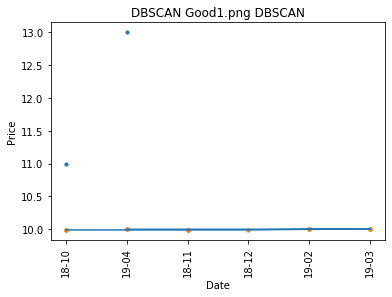

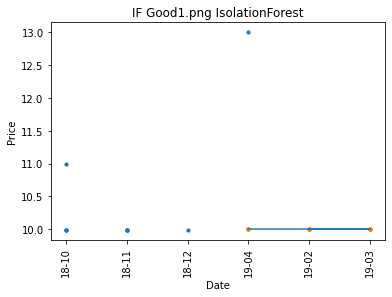

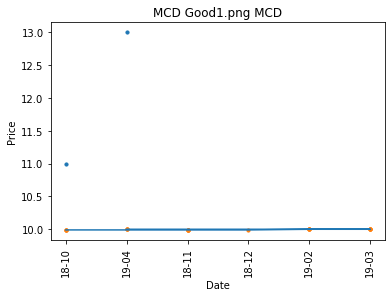

In [ ]:
work(1)

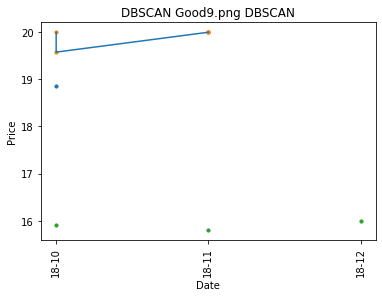

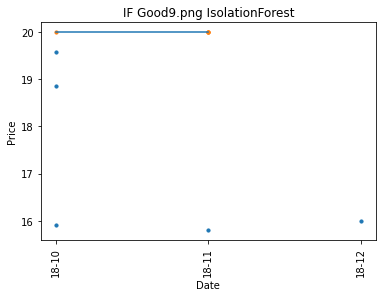

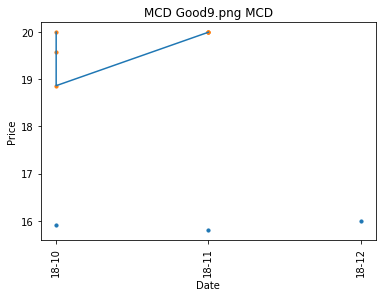

In [ ]:
work(9)

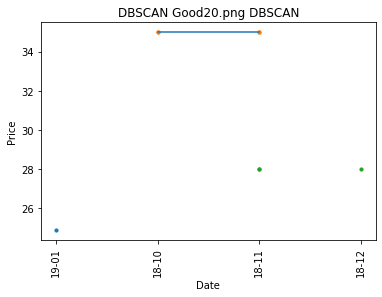

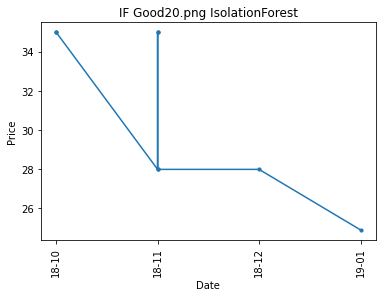

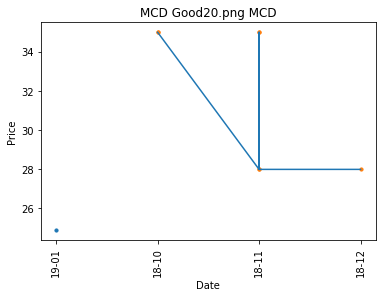

In [ ]:
work(20)

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
from sklearn.covariance import EllipticEnvelope
from numpy import quantile, where, random

def dbScan1(data_x, data_y,name, eps, minpoint, flag=True): # DBSCAN

    plt.clf()
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    db = DBSCAN(eps=eps, min_samples=minpoint).fit(data_y)

    labels = db.labels_
    output = labels

    minn = min(output)
    if minn < 0:
        output = output + -1*minn
    maxn = max(output)

    X, Y = [], []
    for i in range(maxn+1):
        X.append([])
        Y.append([])
    length = len(data_x)
    mpl.rcParams['axes.unicode_minus'] = False  #
    for i in range(length):
        X[output[i]].append(data_x[i])
        Y[output[i]].append(data_y[i])
    print('The first item in the list was added to the list, after which the first item in the list was deleted.')
    print('eps=1, minpoint=3')
    X.append(X[0])
    Y.append(Y[0])
    X.pop(0)
    Y.pop(0)
    if flag == False:
        for i in range(maxn + 1):
            plt.scatter(X[i], Y[i], s=10)

    index = 0
    for i in range(maxn + 1):
        if len(X[index]) <= len(X[i]):
            index = i
    plt.plot(X[index], Y[index])
    plt.xticks(rotation=90)
    plt.title(name+' '+'DBSCAN')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('DBSCAN')
    #print(img_path)
    plt.show()

def MCD1(data_x, data_y, name,contamination=0.02, flag=True):
    '''
    :param data_x:
    :param data_y:
    :param samples:
    :return:
    '''
    plt.clf()
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')

    elenv =     EllipticEnvelope(assume_centered=False, contamination=contamination, random_state=None,
                     store_precision=True, support_fraction=None)

    output = elenv.fit_predict(data_y)

    output[output<0] = 0
    X, Y = [], []
    for i in range(2):
        X.append([])
        Y.append([])
    length = len(data_x)

    for i in range(length):
        X[output[i]].append(data_x[i])
        Y[output[i]].append(data_y[i])

    print("The first item in the list was added to the list, after which the first item in the list was deleted.")
    print("Samples=20")
    print("The orange dots are anomalies.")

    X.append(X[0])
    Y.append(Y[0])
    X.pop(0)
    Y.pop(0)

    mpl.rcParams['axes.unicode_minus'] = False  #

    if flag == True:
        if len(X[1]) != 0:
            plt.scatter(X[1], Y[1], s=10)
        else:
            plt.scatter(X[0], Y[0], s=10)
    else:
        for i in range(2):
            plt.scatter(X[i], Y[i], s=10)
        if len(X[1]) != 0:
            plt.plot(X[0], Y[0])
        else:
            plt.plot(X[1], Y[1])
    plt.xticks(rotation=90)
    plt.title(name+' '+'MCD')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('MCD')
    #print(img_path)
    plt.show()

def IForest1(data_x, data_y,name, samples=5,flag=True):
    '''
    :param data_x:
    :param data_y:
    :param samples:
    :return:
    '''
    plt.clf()
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    clf = IsolationForest(max_samples=samples, random_state=42)
    clf.fit(data_y)
    output = clf.predict(data_y)
    output[output<0] = 0
    X, Y = [], []
    for i in range(2):
        X.append([])
        Y.append([])
    length = len(data_x)

    for i in range(length):
        X[output[i]].append(data_x[i])
        Y[output[i]].append(data_y[i])
    print("The first item in the list was added to the list, after which the first item in the list was deleted.")
    print("Samples=20")
    print("The orange dots are anomalies.")
    X.append(X[0])
    Y.append(Y[0])
    X.pop(0)
    Y.pop(0)
    mpl.rcParams['axes.unicode_minus'] = False  #

    if flag == True:
        if len(X[1]) != 0:
            plt.scatter(X[1], Y[1], s=10)
        else:
            plt.scatter(X[0], Y[0], s=10)
    else:
        for i in range(2):
            plt.scatter(X[i], Y[i], s=10)
        if len(X[1]) != 0:
            plt.plot(X[0], Y[0])
        else:
            plt.plot(X[1], Y[1])
    plt.xticks(rotation=90)
    plt.title(name+' '+'IsolationForest')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('Iforest')
    # print(img_path)
    plt.show()

In [ ]:
def work1(number_): # Divide data into classes
    # Date = ['2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04']
    Date = ['2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04',
            '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
            '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05']
    x, y, z = [], [], []
    model = loadModel( 'DVDs/groups.pkl')
    path = 'DVDs/'
    for j in Date:
        temp_path = path + str(j) + '/' + str(j) + '.pkl'
        date = pk.load(open(temp_path, 'rb'))['date']
        vector = pk.load(open(temp_path, 'rb'))['vector']
        price = pk.load(open(temp_path, 'rb'))['price']
        length = len(date)
        for k in range(length):
            x.append(date[k])
            y.append(vector[k])
            z.append(price[k])
    y_pred = model.fit_predict(y)
    minn = min(y_pred)
    if minn < 0:
        y_pred = y_pred + -1 * minn
    maxn = max(y_pred)
    temp = number_
    #for temp in range(1, maxn+1):
    data_x, data_y = [], []
    for i in range(len(y_pred)):
        if y_pred[i] == temp:
            data_x.append(x[i][2:-3])
            data_y.append(z[i])
        new_data=[]
    for i in range(len(data_y)):
        new_data.append([data_x[i],data_y[i]])
    list_18=[]
    list_19=[]
    list_20=[]
    for i in range(len(new_data)):
      if int(new_data[i][0][0:2])==18:
        list_18.append(new_data[i])
      if int(new_data[i][0][0:2])==19:
        list_19.append(new_data[i])
      if int(new_data[i][0][0:2])==20:
        list_20.append(new_data[i])
    
    list_18_01=[]
    list_18_02=[]
    list_18_03=[]
    list_18_04=[]
    list_18_05=[]
    list_18_06=[]
    list_18_07=[]
    list_18_08=[]
    list_18_09=[]
    list_18_10=[]
    list_18_11=[]
    list_18_12=[]

    for i in range(len(list_18)):
      if int(list_18[i][0][3:5])==int(0x1):
        list_18_01.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x2):
        list_18_02.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x3):
        list_18_03.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x4):
        list_18_04.append(list_18[i])  
      elif int(list_18[i][0][3:5])==int(0x5):
        list_18_05.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x6):
        list_18_06.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x7):
        list_18_07.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x8):
        list_18_08.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x9):
        list_18_09.append(list_18[i])
      elif int(list_18[i][0][3:5])==10:
        list_18_10.append(list_18[i])
      elif int(list_18[i][0][3:5])==11:
        list_18_11.append(list_18[i])
      elif int(list_18[i][0][3:5])==12:
        list_18_12.append(list_18[i])

    list_19_01=[]
    list_19_02=[]
    list_19_03=[]
    list_19_04=[]
    list_19_05=[]
    list_19_06=[]
    list_19_07=[]
    list_19_08=[]
    list_19_09=[]
    list_19_10=[]
    list_19_11=[]
    list_19_12=[]

    for i in range(len(list_19)):
      if int(list_19[i][0][3:5])==int(0x1):
        list_19_01.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x2):
        list_19_02.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x3):
        list_19_03.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x4):
        list_19_04.append(list_19[i])  
      elif int(list_19[i][0][3:5])==int(0x5):
        list_19_05.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x6):
        list_19_06.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x7):
        list_19_07.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x8):
        list_19_08.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x9):
        list_19_09.append(list_19[i])
      elif int(list_19[i][0][3:5])==10:
        list_19_10.append(list_19[i])
      elif int(list_19[i][0][3:5])==11:
        list_19_11.append(list_19[i])
      elif int(list_19[i][0][3:5])==12:
        list_19_12.append(list_19[i])


    list_20_01=[]
    list_20_02=[]
    list_20_03=[]
    list_20_04=[]
    list_20_05=[]
    list_20_06=[]
    list_20_07=[]
    list_20_08=[]
    list_20_09=[]
    list_20_10=[]
    list_20_11=[]
    list_20_12=[]

    for i in range(len(list_20)):
      if int(list_20[i][0][3:5])==int(0x1):
        list_20_01.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x2):
        list_20_02.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x3):
        list_20_03.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x4):
        list_20_04.append(list_20[i])  
      elif int(list_20[i][0][3:5])==int(0x5):
        list_20_05.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x6):
        list_20_06.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x7):
        list_20_07.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x8):
        list_20_08.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x9):
        list_20_09.append(list_20[i])
      elif int(list_20[i][0][3:5])==10:
        list_20_10.append(list_20[i])
      elif int(list_20[i][0][3:5])==11:
        list_20_11.append(list_20[i])
      elif int(list_20[i][0][3:5])==12:
        list_20_12.append(list_20[i])

    new_data_x, new_data_y = [],[]
    end_new_data=list_18_01+list_18_02+list_18_03+list_18_04+list_18_05+list_18_06+list_18_07+list_18_08+list_18_09+list_18_10+list_18_11+list_18_12+list_19_01+list_19_02+list_19_03+list_19_04+list_19_05+list_19_06+list_19_07+list_19_08+list_19_09+list_19_10+list_19_11+list_19_12+list_20_01
    for i in range(len(end_new_data)):
      new_data_x.append(end_new_data[i][0])
      new_data_y.append(end_new_data[i][1])



    img_path = 'DVDs/imgs/Good'+str(temp) + '.png'


    dbScan(new_data_x, new_data_y,name='DBSCAN Good '+str(temp), eps=0.5, minpoint=3, flag=False)
    dbScan1(new_data_x, new_data_y,name='DBSCAN Good with Manipulation '+str(temp), eps=1, minpoint=3, flag=False)
    IForest(new_data_x,new_data_y,name='IF Good '+str(temp), samples=10,flag=False)
    IForest1(new_data_x, new_data_y,name='IF with Manipulation Good '+str(temp), samples=20,flag=False)
    MCD(new_data_x,new_data_y,name='MCD Good '+str(temp),contamination=0.3, flag=False)
    MCD1(new_data_x,new_data_y, name='MCD with Manipulation Good '+str(temp),contamination=0.3, flag=False)


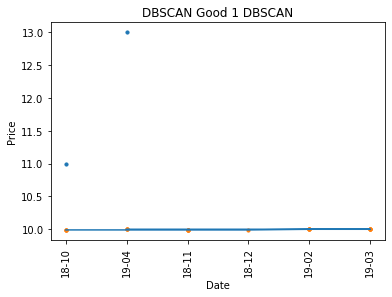

The first item in the list was added to the list, after which the first item in the list was deleted.
eps=1, minpoint=3


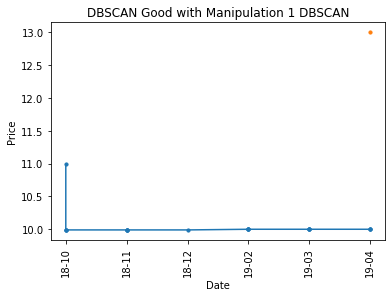

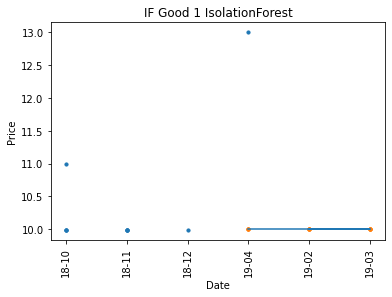

The first item in the list was added to the list, after which the first item in the list was deleted.
Samples=20
The orange dots are anomalies.


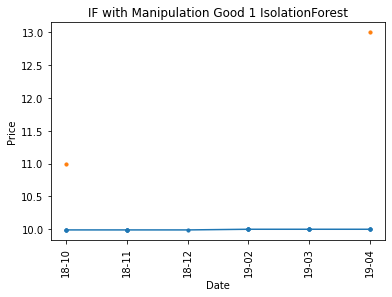

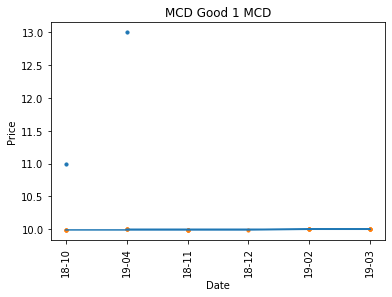

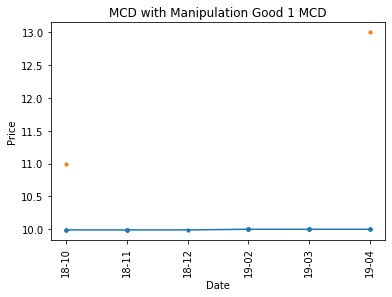

In [ ]:
work1(1)

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
from sklearn.covariance import EllipticEnvelope
from numpy import quantile, where, random

def dbScan2(data_x, data_y,name, eps, minpoint, flag=True): # DBSCAN

    plt.clf()
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    db = DBSCAN(eps=eps, min_samples=minpoint).fit(data_y)

    labels = db.labels_
    output = labels

    minn = min(output)
    if minn < 0:
        output = output + -1*minn
    maxn = max(output)

    X, Y = [], []
    for i in range(maxn+1):
        X.append([])
        Y.append([])
    length = len(data_x)
    mpl.rcParams['axes.unicode_minus'] = False  #
    for i in range(length):
        X[output[i]].append(data_x[i])
        Y[output[i]].append(data_y[i])

    if flag == False:
        for i in range(maxn + 1):
            plt.scatter(X[i], Y[i], s=10)

    index = 0
    for i in range(maxn + 1):
        if len(X[index]) <= len(X[i]):
            index = i
    plt.plot(X[index], Y[index])
    plt.xticks(rotation=90)
    plt.title(name+' '+'DBSCAN')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('DBSCAN')
    #print(img_path)
    plt.show()

def MCD2(data_x, data_y, name,contamination=0.02, flag=True):
    '''
    :param data_x:
    :param data_y:
    :param samples:
    :return:
    '''
    plt.clf()
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    #     clf = IsolationForest(max_samples=samples, random_state=42)
    #     clf.fit(data_y)
    elenv =     EllipticEnvelope(assume_centered=False, contamination=contamination, random_state=None,
                     store_precision=True, support_fraction=None)
    #data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    #clf = IsolationForest(max_samples=samples, random_state=42)
    #clf.fit(data_y)
    output = elenv.fit_predict(data_y)
    #output = clf.predict(data_y)
    output[output<0] = 0
    X, Y = [], []
    for i in range(2):
        X.append([])
        Y.append([])
    length = len(data_x)

    for i in range(length):
        X[output[i]].append(data_x[i])
        Y[output[i]].append(data_y[i])

    mpl.rcParams['axes.unicode_minus'] = False  #

    if flag == True:
        if len(X[1]) != 0:
            plt.scatter(X[1], Y[1], s=10)
        else:
            plt.scatter(X[0], Y[0], s=10)
    else:
        for i in range(2):
            plt.scatter(X[i], Y[i], s=10)
        if len(X[1]) != 0:
            plt.plot(X[1], Y[1])
        else:
            plt.plot(X[0], Y[0])
    plt.xticks(rotation=90)
    plt.title(name+' '+'MCD')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('MCD')
    #print(img_path)
    plt.show()

def IForest2(data_x, data_y,name, samples=5,flag=True):
    '''
    :param data_x:
    :param data_y:
    :param samples:
    :return:
    '''
    plt.clf()
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    clf = IsolationForest(max_samples=samples, random_state=42)
    clf.fit(data_y)
    output = clf.predict(data_y)
    output[output<0] = 0
    X, Y = [], []
    for i in range(2):
        X.append([])
        Y.append([])
    length = len(data_x)

    for i in range(length):
        X[output[i]].append(data_x[i])
        Y[output[i]].append(data_y[i])

    mpl.rcParams['axes.unicode_minus'] = False  #

    if flag == True:
        if len(X[1]) != 0:
            plt.scatter(X[1], Y[1], s=10)
        else:
            plt.scatter(X[0], Y[0], s=10)
    else:
        for i in range(2):
            plt.scatter(X[i], Y[i], s=10)
        if len(X[1]) != 0:
            plt.plot(X[1], Y[1])
        else:
            plt.plot(X[0], Y[0])
    plt.xticks(rotation=90)
    plt.title(name+' '+'IsolationForest')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('Iforest')
    # print(img_path)
    plt.show()

In [ ]:
def work2(number_): # Divide data into classes
    # Date = ['2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04']
    Date = ['2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04',
            '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
            '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05']
    x, y, z = [], [], []
    model = loadModel( 'DVDs/groups.pkl')
    path = 'DVDs/'
    for j in Date:
        temp_path = path + str(j) + '/' + str(j) + '.pkl'
        date = pk.load(open(temp_path, 'rb'))['date']
        vector = pk.load(open(temp_path, 'rb'))['vector']
        price = pk.load(open(temp_path, 'rb'))['price']
        length = len(date)
        for k in range(length):
            x.append(date[k])
            y.append(vector[k])
            z.append(price[k])
    y_pred = model.fit_predict(y)
    minn = min(y_pred)
    if minn < 0:
        y_pred = y_pred + -1 * minn
    maxn = max(y_pred)
    temp = number_
    #for temp in range(1, maxn+1):
    data_x, data_y = [], []
    for i in range(len(y_pred)):
        if y_pred[i] == temp:
            data_x.append(x[i][2:-3])
            data_y.append(z[i])
        new_data=[]
    for i in range(len(data_y)):
        new_data.append([data_x[i],data_y[i]])
    list_18=[]
    list_19=[]
    list_20=[]
    for i in range(len(new_data)):
      if int(new_data[i][0][0:2])==18:
        list_18.append(new_data[i])
      if int(new_data[i][0][0:2])==19:
        list_19.append(new_data[i])
      if int(new_data[i][0][0:2])==20:
        list_20.append(new_data[i])
    
    list_18_01=[]
    list_18_02=[]
    list_18_03=[]
    list_18_04=[]
    list_18_05=[]
    list_18_06=[]
    list_18_07=[]
    list_18_08=[]
    list_18_09=[]
    list_18_10=[]
    list_18_11=[]
    list_18_12=[]

    for i in range(len(list_18)):
      if int(list_18[i][0][3:5])==int(0x1):
        list_18_01.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x2):
        list_18_02.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x3):
        list_18_03.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x4):
        list_18_04.append(list_18[i])  
      elif int(list_18[i][0][3:5])==int(0x5):
        list_18_05.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x6):
        list_18_06.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x7):
        list_18_07.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x8):
        list_18_08.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x9):
        list_18_09.append(list_18[i])
      elif int(list_18[i][0][3:5])==10:
        list_18_10.append(list_18[i])
      elif int(list_18[i][0][3:5])==11:
        list_18_11.append(list_18[i])
      elif int(list_18[i][0][3:5])==12:
        list_18_12.append(list_18[i])

    list_19_01=[]
    list_19_02=[]
    list_19_03=[]
    list_19_04=[]
    list_19_05=[]
    list_19_06=[]
    list_19_07=[]
    list_19_08=[]
    list_19_09=[]
    list_19_10=[]
    list_19_11=[]
    list_19_12=[]

    for i in range(len(list_19)):
      if int(list_19[i][0][3:5])==int(0x1):
        list_19_01.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x2):
        list_19_02.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x3):
        list_19_03.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x4):
        list_19_04.append(list_19[i])  
      elif int(list_19[i][0][3:5])==int(0x5):
        list_19_05.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x6):
        list_19_06.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x7):
        list_19_07.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x8):
        list_19_08.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x9):
        list_19_09.append(list_19[i])
      elif int(list_19[i][0][3:5])==10:
        list_19_10.append(list_19[i])
      elif int(list_19[i][0][3:5])==11:
        list_19_11.append(list_19[i])
      elif int(list_19[i][0][3:5])==12:
        list_19_12.append(list_19[i])


    list_20_01=[]
    list_20_02=[]
    list_20_03=[]
    list_20_04=[]
    list_20_05=[]
    list_20_06=[]
    list_20_07=[]
    list_20_08=[]
    list_20_09=[]
    list_20_10=[]
    list_20_11=[]
    list_20_12=[]

    for i in range(len(list_20)):
      if int(list_20[i][0][3:5])==int(0x1):
        list_20_01.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x2):
        list_20_02.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x3):
        list_20_03.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x4):
        list_20_04.append(list_20[i])  
      elif int(list_20[i][0][3:5])==int(0x5):
        list_20_05.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x6):
        list_20_06.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x7):
        list_20_07.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x8):
        list_20_08.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x9):
        list_20_09.append(list_20[i])
      elif int(list_20[i][0][3:5])==10:
        list_20_10.append(list_20[i])
      elif int(list_20[i][0][3:5])==11:
        list_20_11.append(list_20[i])
      elif int(list_20[i][0][3:5])==12:
        list_20_12.append(list_20[i])

    new_data_x, new_data_y = [],[]
    end_new_data=list_18_01+list_18_02+list_18_03+list_18_04+list_18_05+list_18_06+list_18_07+list_18_08+list_18_09+list_18_10+list_18_11+list_18_12+list_19_01+list_19_02+list_19_03+list_19_04+list_19_05+list_19_06+list_19_07+list_19_08+list_19_09+list_19_10+list_19_11+list_19_12+list_20_01
    for i in range(len(end_new_data)):
      new_data_x.append(end_new_data[i][0])
      new_data_y.append(end_new_data[i][1])


    #print(x[0])
    img_path = 'DVDs/imgs/Good'+str(temp) + '.png'

    #filter_out(data_x, data_y, name=temp, img_path=img_path)
    #dbScan(data_x, data_y, eps=0.5, minpoint=3, img_path=img_path)
    #MCD_filter_out(data_x,data_y,name=temp,contamination=0.02)
    #MCD(data_x, data_y, contamination=0.3)
    #IForest(data_x, data_y, samples=5)
    dbScan(new_data_x, new_data_y,name='DBSCAN Good '+str(temp), eps=0.5, minpoint=3, flag=False)
    dbScan2(new_data_x, new_data_y,name='DBSCAN Good with Manipulation '+str(temp), eps=1, minpoint=3, flag=False)
    IForest(new_data_x,new_data_y,name='IF Good '+str(temp), samples=10,flag=False)
    IForest2(new_data_x, new_data_y,name='IF with Manipulation Good '+str(temp), samples=4,flag=False)
    MCD(new_data_x,new_data_y,name='MCD Good '+str(temp),contamination=0.3, flag=False)
    MCD2(new_data_x,new_data_y, name='MCD with Manipulation Good '+str(temp),contamination=0.3, flag=False)
    #IForest(data_x, data_y, name='IF Good'+str(temp)+'.png', samples=10, flag=False)
    #IForest(new_data_x, new_data_y, name='IF Good'+str(temp)+'.png', samples=10, flag=False)
    #MCD(data_x, data_y, name='MCD Good'+str(temp)+'.png', contamination=0.3, flag=False)

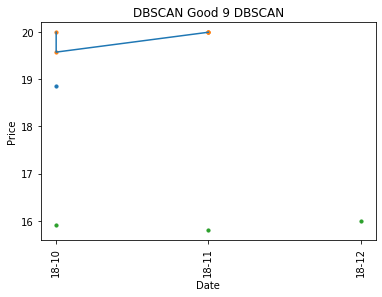

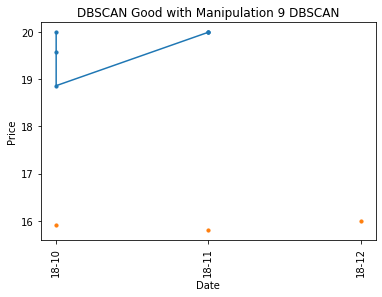

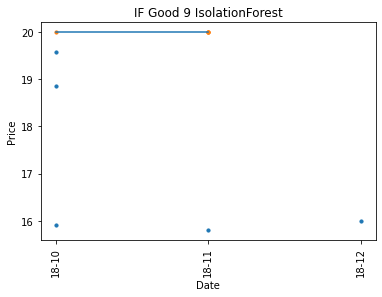

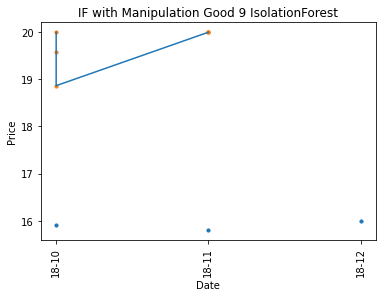

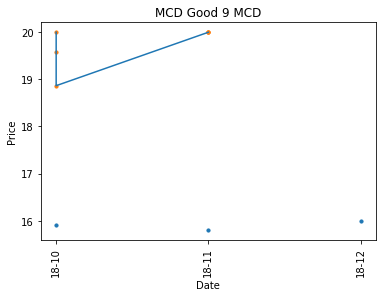

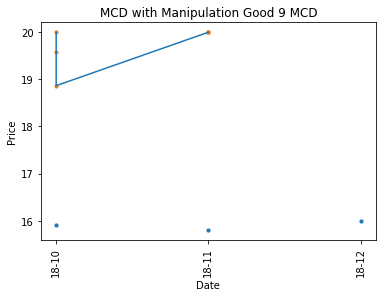

In [ ]:
work2(9)

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
from sklearn.covariance import EllipticEnvelope
from numpy import quantile, where, random

def dbScan3(data_x, data_y,name, eps, minpoint, flag=True): # DBSCAN

    plt.clf()
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    db = DBSCAN(eps=eps, min_samples=minpoint).fit(data_y)

    labels = db.labels_
    output = labels

    minn = min(output)
    if minn < 0:
        output = output + -1*minn
    maxn = max(output)

    X, Y = [], []
    for i in range(maxn+1):
        X.append([])
        Y.append([])
    length = len(data_x)
    mpl.rcParams['axes.unicode_minus'] = False  #
    for i in range(length):
        X[output[i]].append(data_x[i])
        Y[output[i]].append(data_y[i])

    if flag == False:
        for i in range(maxn + 1):
            plt.scatter(X[i], Y[i], s=10)

    index = 0
    for i in range(maxn + 1):
        if len(X[index]) <= len(X[i]):
            index = i
    plt.plot(X[index], Y[index])
    plt.xticks(rotation=90)
    plt.title(name+' '+'DBSCAN')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('DBSCAN')
    #print(img_path)
    plt.show()

def MCD3(data_x, data_y, name,contamination=0.02, flag=True):
    '''
    :param data_x:
    :param data_y:
    :param samples:
    :return:
    '''
    plt.clf()
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    #     clf = IsolationForest(max_samples=samples, random_state=42)
    #     clf.fit(data_y)
    elenv =     EllipticEnvelope(assume_centered=False, contamination=contamination, random_state=None,
                     store_precision=True, support_fraction=None)
    #data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    #clf = IsolationForest(max_samples=samples, random_state=42)
    #clf.fit(data_y)
    output = elenv.fit_predict(data_y)
    #output = clf.predict(data_y)
    output[output<0] = 0
    X, Y = [], []
    for i in range(2):
        X.append([])
        Y.append([])
    length = len(data_x)

    for i in range(length):
        X[output[i]].append(data_x[i])
        Y[output[i]].append(data_y[i])

    mpl.rcParams['axes.unicode_minus'] = False  #
    X.append(X[0])
    Y.append(Y[0])
    X.pop(0)
    Y.pop(0)
    print("The first element from the list was added to the end of the list again and the first element is then removed")
    if flag == True:
        if len(X[1]) != 0:
            plt.scatter(X[1], Y[1], s=10)
        else:
            plt.scatter(X[0], Y[0], s=10)
    else:
        for i in range(2):
            plt.scatter(X[i], Y[i], s=10)
        if len(X[1]) != 0:
            plt.plot(X[0], Y[0])
        else:
            plt.plot(X[1], Y[1])
    plt.xticks(rotation=90)
    plt.title(name+' '+'MCD')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('MCD')
    #print(img_path)
    plt.show()

def IForest3(data_x, data_y,name, samples=5,flag=True):
    '''
    :param data_x:
    :param data_y:
    :param samples:
    :return:
    '''
    plt.clf()
    data_y = np.array(data_y).reshape(-1, 1).astype('float32')
    clf = IsolationForest(max_samples=samples, random_state=42)
    clf.fit(data_y)
    output = clf.predict(data_y)
    output[output<0] = 0
    X, Y = [], []
    for i in range(2):
        X.append([])
        Y.append([])
    length = len(data_x)

    for i in range(length):
        X[output[i]].append(data_x[i])
        Y[output[i]].append(data_y[i])

    mpl.rcParams['axes.unicode_minus'] = False  #
    X.append(X[0])
    Y.append(Y[0])
    X.pop(0)
    Y.pop(0)
    print("The first element from the list was added to the end of the list again and the first element is then removed.")
    print("samples = 4")
    if flag == True:
        if len(X[1]) != 0:
            plt.scatter(X[1], Y[1], s=10)
        else:
            plt.scatter(X[0], Y[0], s=10)
    else:
        for i in range(2):
            plt.scatter(X[i], Y[i], s=10)
        if len(X[1]) != 0:
            plt.plot(X[0], Y[0])
        else:
            plt.plot(X[1], Y[1])
    plt.xticks(rotation=90)
    plt.title(name+' '+'IsolationForest')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.savefig('Iforest')
    # print(img_path)
    plt.show()

In [ ]:
def work3(number_): # Divide data into classes
    # Date = ['2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04']
    Date = ['2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04',
            '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
            '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05']
    x, y, z = [], [], []
    model = loadModel( 'DVDs/groups.pkl')
    path = 'DVDs/'
    for j in Date:
        temp_path = path + str(j) + '/' + str(j) + '.pkl'
        date = pk.load(open(temp_path, 'rb'))['date']
        vector = pk.load(open(temp_path, 'rb'))['vector']
        price = pk.load(open(temp_path, 'rb'))['price']
        length = len(date)
        for k in range(length):
            x.append(date[k])
            y.append(vector[k])
            z.append(price[k])
    y_pred = model.fit_predict(y)
    minn = min(y_pred)
    if minn < 0:
        y_pred = y_pred + -1 * minn
    maxn = max(y_pred)
    temp = number_
    #for temp in range(1, maxn+1):
    data_x, data_y = [], []
    for i in range(len(y_pred)):
        if y_pred[i] == temp:
            data_x.append(x[i][2:-3])
            data_y.append(z[i])
        new_data=[]
    for i in range(len(data_y)):
        new_data.append([data_x[i],data_y[i]])
    list_18=[]
    list_19=[]
    list_20=[]
    for i in range(len(new_data)):
      if int(new_data[i][0][0:2])==18:
        list_18.append(new_data[i])
      if int(new_data[i][0][0:2])==19:
        list_19.append(new_data[i])
      if int(new_data[i][0][0:2])==20:
        list_20.append(new_data[i])
    
    list_18_01=[]
    list_18_02=[]
    list_18_03=[]
    list_18_04=[]
    list_18_05=[]
    list_18_06=[]
    list_18_07=[]
    list_18_08=[]
    list_18_09=[]
    list_18_10=[]
    list_18_11=[]
    list_18_12=[]

    for i in range(len(list_18)):
      if int(list_18[i][0][3:5])==int(0x1):
        list_18_01.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x2):
        list_18_02.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x3):
        list_18_03.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x4):
        list_18_04.append(list_18[i])  
      elif int(list_18[i][0][3:5])==int(0x5):
        list_18_05.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x6):
        list_18_06.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x7):
        list_18_07.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x8):
        list_18_08.append(list_18[i])
      elif int(list_18[i][0][3:5])==int(0x9):
        list_18_09.append(list_18[i])
      elif int(list_18[i][0][3:5])==10:
        list_18_10.append(list_18[i])
      elif int(list_18[i][0][3:5])==11:
        list_18_11.append(list_18[i])
      elif int(list_18[i][0][3:5])==12:
        list_18_12.append(list_18[i])

    list_19_01=[]
    list_19_02=[]
    list_19_03=[]
    list_19_04=[]
    list_19_05=[]
    list_19_06=[]
    list_19_07=[]
    list_19_08=[]
    list_19_09=[]
    list_19_10=[]
    list_19_11=[]
    list_19_12=[]

    for i in range(len(list_19)):
      if int(list_19[i][0][3:5])==int(0x1):
        list_19_01.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x2):
        list_19_02.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x3):
        list_19_03.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x4):
        list_19_04.append(list_19[i])  
      elif int(list_19[i][0][3:5])==int(0x5):
        list_19_05.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x6):
        list_19_06.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x7):
        list_19_07.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x8):
        list_19_08.append(list_19[i])
      elif int(list_19[i][0][3:5])==int(0x9):
        list_19_09.append(list_19[i])
      elif int(list_19[i][0][3:5])==10:
        list_19_10.append(list_19[i])
      elif int(list_19[i][0][3:5])==11:
        list_19_11.append(list_19[i])
      elif int(list_19[i][0][3:5])==12:
        list_19_12.append(list_19[i])


    list_20_01=[]
    list_20_02=[]
    list_20_03=[]
    list_20_04=[]
    list_20_05=[]
    list_20_06=[]
    list_20_07=[]
    list_20_08=[]
    list_20_09=[]
    list_20_10=[]
    list_20_11=[]
    list_20_12=[]

    for i in range(len(list_20)):
      if int(list_20[i][0][3:5])==int(0x1):
        list_20_01.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x2):
        list_20_02.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x3):
        list_20_03.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x4):
        list_20_04.append(list_20[i])  
      elif int(list_20[i][0][3:5])==int(0x5):
        list_20_05.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x6):
        list_20_06.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x7):
        list_20_07.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x8):
        list_20_08.append(list_20[i])
      elif int(list_20[i][0][3:5])==int(0x9):
        list_20_09.append(list_20[i])
      elif int(list_20[i][0][3:5])==10:
        list_20_10.append(list_20[i])
      elif int(list_20[i][0][3:5])==11:
        list_20_11.append(list_20[i])
      elif int(list_20[i][0][3:5])==12:
        list_20_12.append(list_20[i])

    new_data_x, new_data_y = [],[]
    end_new_data=list_18_01+list_18_02+list_18_03+list_18_04+list_18_05+list_18_06+list_18_07+list_18_08+list_18_09+list_18_10+list_18_11+list_18_12+list_19_01+list_19_02+list_19_03+list_19_04+list_19_05+list_19_06+list_19_07+list_19_08+list_19_09+list_19_10+list_19_11+list_19_12+list_20_01
    for i in range(len(end_new_data)):
      new_data_x.append(end_new_data[i][0])
      new_data_y.append(end_new_data[i][1])


    #print(x[0])
    img_path = 'DVDs/imgs/Good'+str(temp) + '.png'

    #filter_out(data_x, data_y, name=temp, img_path=img_path)
    #dbScan(data_x, data_y, eps=0.5, minpoint=3, img_path=img_path)
    #MCD_filter_out(data_x,data_y,name=temp,contamination=0.02)
    #MCD(data_x, data_y, contamination=0.3)
    #IForest(data_x, data_y, samples=5)
    dbScan(new_data_x, new_data_y,name='DBSCAN Good '+str(temp), eps=0.5, minpoint=3, flag=False)
    dbScan3(new_data_x, new_data_y,name='DBSCAN Good with Manipulation '+str(temp), eps=4, minpoint=3, flag=False)
    IForest(new_data_x,new_data_y,name='IF Good '+str(temp), samples=10,flag=False)
    IForest3(new_data_x, new_data_y,name='IF with Manipulation Good '+str(temp), samples=4,flag=False)
    MCD(new_data_x,new_data_y,name='MCD Good '+str(temp),contamination=0.3, flag=False)
    MCD3(new_data_x,new_data_y, name='MCD with Manipulation Good '+str(temp),contamination=0.3, flag=False)
    #IForest(data_x, data_y, name='IF Good'+str(temp)+'.png', samples=10, flag=False)
    #IForest(new_data_x, new_data_y, name='IF Good'+str(temp)+'.png', samples=10, flag=False)
    #MCD(data_x, data_y, name='MCD Good'+str(temp)+'.png', contamination=0.3, flag=False)

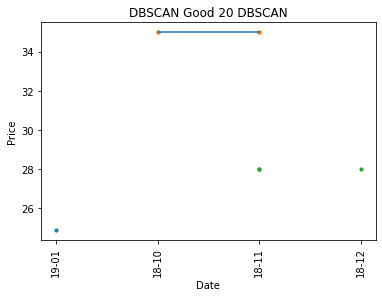

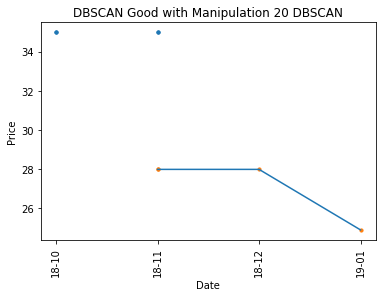

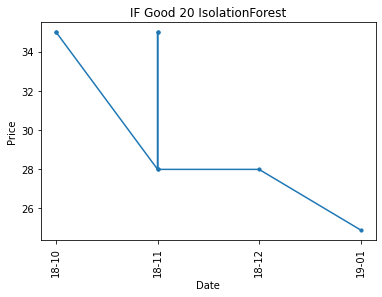

The first element from the list was added to the end of the list again and the first element is then removed.
samples = 4


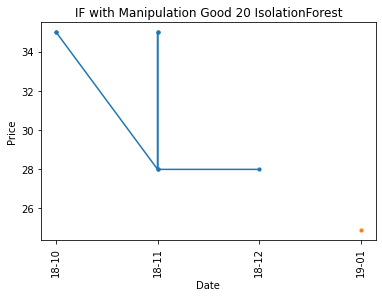

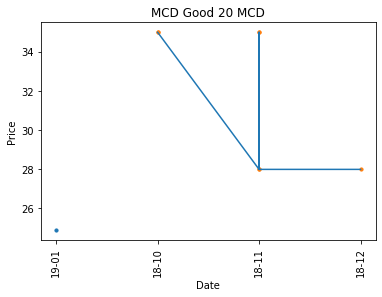

The first element from the list was added to the end of the list again and the first element is then removed


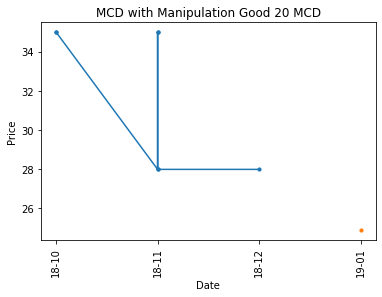

In [ ]:
work3(20)